In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("decision-tree-regression-dataset.csv", header=None)
print(data.info())
print("********************************************************")
print(data.head())
print("********************************************************")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10 non-null     int64
 1   1       10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes
None
********************************************************
   0    1
0  1  100
1  2   80
2  3   70
3  4   60
4  5   50
********************************************************
              0          1
count  10.00000   10.00000
mean    5.50000   46.50000
std     3.02765   31.27388
min     1.00000    5.00000
25%     3.25000   22.50000
50%     5.50000   45.00000
75%     7.75000   67.50000
max    10.00000  100.00000


In [2]:
x = data.iloc[:,[0]].values.reshape(-1,1)
y = data.iloc[:,[1]].values.reshape(-1,1)

In [3]:
#%%  decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

print(tree_reg.predict(np.array([5.5]).reshape(-1,1)))

[50.]


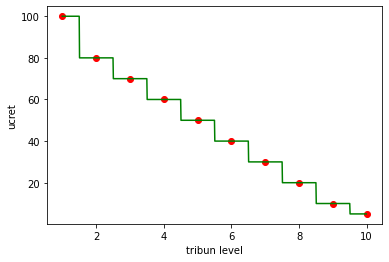

r_square score:  1.0


In [5]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
#print(x)
y_head = tree_reg.predict(x_)
#print(y_head)

# %% visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color = "green")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

y_head = tree_reg.predict(x)
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=sns.load_dataset("tips")
df=pd.DataFrame(data)

#EKSİK VERİ DOLDURMA
from sklearn.impute import SimpleImputer
import numpy as np

imputer=SimpleImputer(missing_values=np.nan, strategy="mean") #eksik verileri boş sütünlarına ortalamasını verdik
imputer=imputer.fit(df[["total_bill"]])
df[["total_bill"]]=imputer.transform(df[["total_bill"]])

#KATEGORİK OLMAYAN DEĞİŞKENLER
total_bill=df[["total_bill"]]
tip=df[["tip"]]
size=df[["size"]]

#KATEGORİK DEĞİŞKENLER

import pandas as pd
smoker=pd.get_dummies(df[["smoker"]])
time=pd.get_dummies(df[["day"]])

result=df["day"].value_counts()

#KUKLA (DUMMIES) DEĞİŞKENİNİ KALDIRMA
smoker=smoker.drop("smoker_Yes",axis=1)

#VERİLERİ BİRLEŞTİRME
new_data=pd.concat([total_bill,size,smoker,time,tip],axis=1) # tahmin etmek istedğiniz değeri sona koyun train test split için kolaylık sağlar

#TRAİN VE TEST BELİRLEME
training=new_data.iloc[:,0:1].values # 7 ye kadarkı stunlar train için
testing=new_data.iloc[:,7:8].values

#TRAİN VE TEST AYIRMA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=0.30,random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [8]:
y_pred=dtr.predict(x_test)
y_tahmin=pd.DataFrame(data=y_pred)
y_test=pd.DataFrame(data=y_test)
y_tahmin.index=y_test.index

result=pd.concat([y_tahmin,y_test],axis=1)
result.columns=[["Tahmin","Gerçek"]]
print(result)

   Tahmin Gerçek
0    4.19   3.18
1    1.92   2.00
2    3.61   2.00
3    4.00   5.16
4    2.00   2.00
..    ...    ...
69   3.61   3.48
70   4.19   2.00
71   6.50   3.00
72   2.54   2.71
73   4.19   3.00

[74 rows x 2 columns]


In [9]:
import statsmodels.api as sm

decision_tree=sm.OLS(dtr.predict(x_train),x_train)
model=decision_tree.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              1379.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    3.46e-83
Time:                        00:39:36   Log-Likelihood:                         -261.75
No. Observations:                 170   AIC:                                      525.5
Df Residuals:                     169   BIC:                                      528.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1449      0.004     37.132      0.000       0.137       0.153
==============================================================================
Omnibus:                       25.387   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.410
Skew:                          -0.776   Prob(JB):                     1.02e-09
Kurtosis:                       4.854   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from sklearn.metrics import mean_squared_error

mse=np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
print("Train RMSE:",mse)
mse=np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
print("Test RMSE:",mse)

Train RMSE: 1.1359108762265422
Test RMSE: 0.9604923709876836


In [11]:
training=new_data.iloc[:,0:1].values # 7 ye kadarkı stunlar train için
testing=new_data.iloc[:,7:8].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=0.30,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

import statsmodels.api as sm

decision_tree=sm.OLS(dtr.predict(x_train),x_train)
model=decision_tree.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              1379.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    3.46e-83
Time:                        00:39:51   Log-Likelihood:                         -261.75
No. Observations:                 170   AIC:                                      525.5
Df Residuals:                     169   BIC:                                      528.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1449      0.004     37.132      0.000       0.137       0.153
==============================================================================
Omnibus:                       25.387   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.410
Skew:                          -0.776   Prob(JB):                     1.02e-09
Kurtosis:                       4.854   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
mse=np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
print("Train RMSE:",mse)
mse=np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
print("Test RMSE:",mse)

Train RMSE: 1.1359108762265422
Test RMSE: 0.9604923709876836
